In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def get_scores(path, text_line_start, text_score_start, index_start, start_iter_indx, end_iter_indx):

    results = []
    max_results = []
    
    for i in range(start_iter_indx, end_iter_indx):
        iter_score = []
        file1 = open(path + str(i) + '.txt', 'r') 
        lines = file1.readlines() 
        for line in lines:
            if line.startswith(text_line_start):
                scores = line.split(',')

                for sc in scores:
                    if sc.strip().startswith(text_score_start):
                        sc_fl = float(sc[index_start:])
                        iter_score.append(sc_fl)

        results.append(iter_score)
        max_results.append(max(iter_score))
        
        file1.close()

    return results, max_results
        

In [16]:
path = 'results/200/raw/results-200-raw-15iter-'
dev_accuracies = get_scores(path, 'train loss', 'dev acc', 9, 1, 17)
train_loss, train_loss_max = get_scores(path, 'train loss', 'train loss', 12, 1, 17)
test_accuracies, test_max_acc = get_scores(path, 'test acc', 'test acc', 10, 1, 17)
test_precision = get_scores(path, 'test acc', 'test precision', 16, 1, 17)
test_recall = get_scores(path, 'test acc', 'test recall', 13, 1, 17)
test_f1_score, test_max_f1 = get_scores(path, 'test acc', 'test f1', 9, 1, 17)

In [4]:
def draw_boxplot(data, title):
    plt.clf()
    df = pd.DataFrame(data=data)
    #print(df.T)
    plt.rcParams['figure.figsize'] = [20, 5]

    fig = plt.figure();
    fig.suptitle(title, fontsize=14, fontweight='bold')

    bp = df.T.boxplot(fontsize=14)

In [5]:
def draw_line_graph(data, ylabel, xlabel):
    plt.clf()
    #df = pd.DataFrame(data=data)
    #print(df.T)
    plt.rcParams['figure.figsize'] = [20, 5]

    plt.plot(data)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

<Figure size 432x288 with 0 Axes>

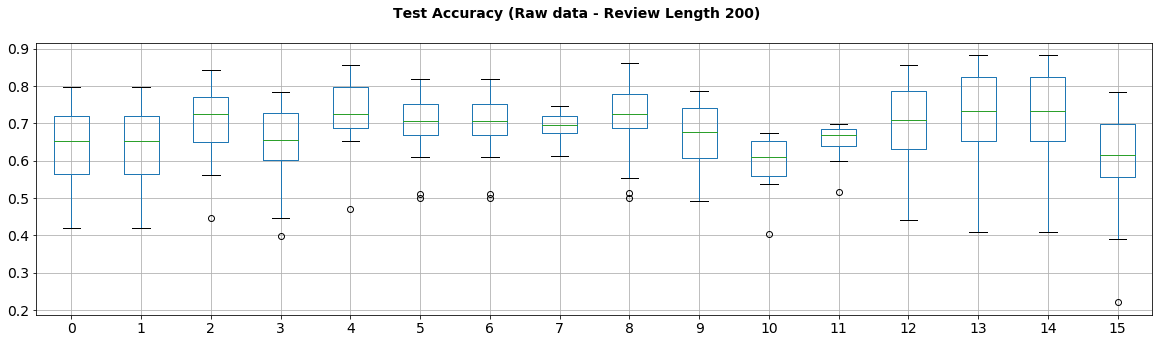

In [6]:
draw_boxplot(test_accuracies, 'Test Accuracy (Raw data - Review Length 200)')

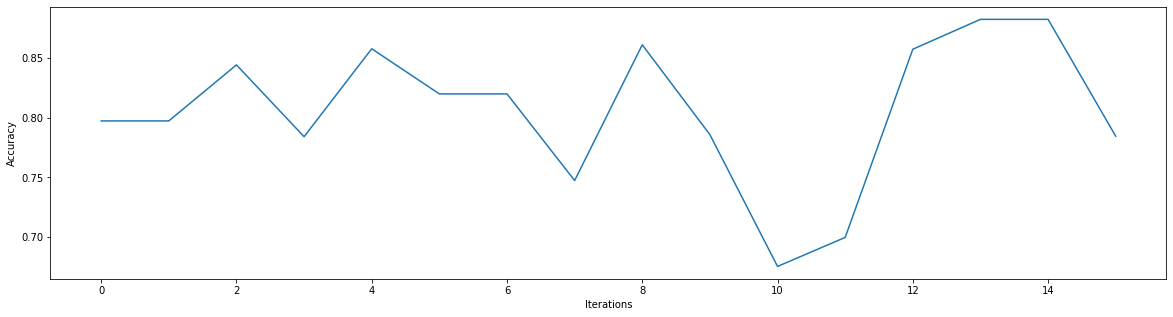

In [7]:
draw_line_graph(test_max_acc, 'Accuracy', 'Iterations')

<Figure size 1440x360 with 0 Axes>

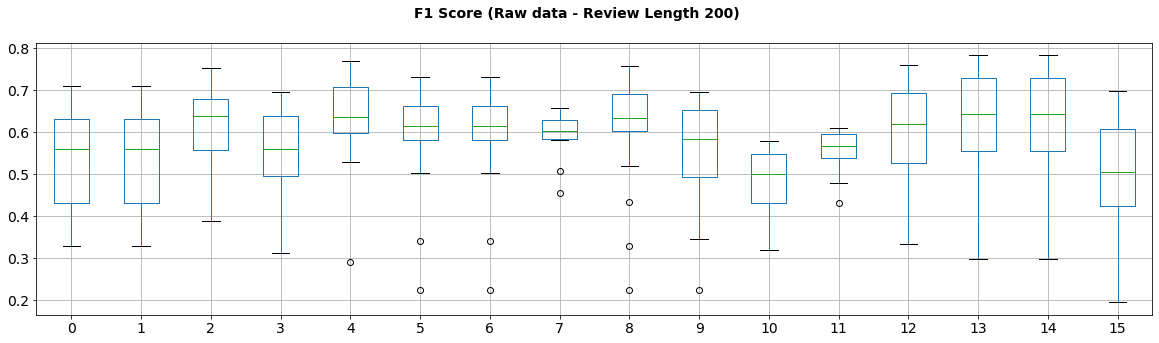

In [8]:
draw_boxplot(test_f1_score, 'F1 Score (Raw data - Review Length 200)')

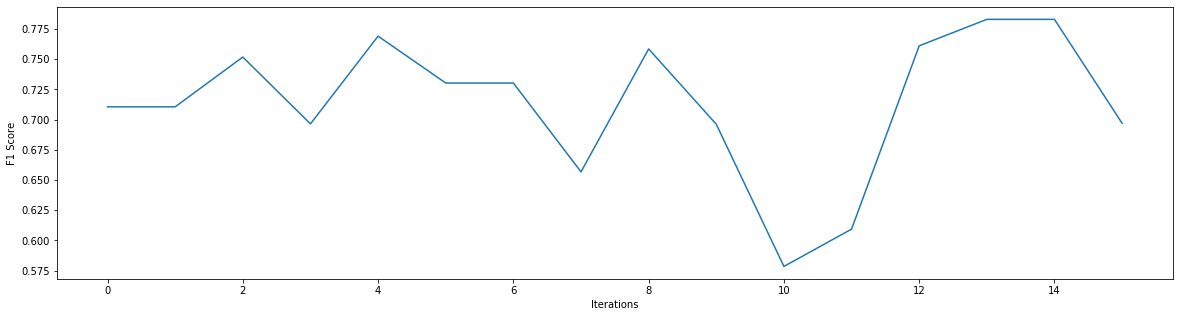

In [9]:
draw_line_graph(test_max_f1, 'F1 Score', 'Iterations')

In [10]:
test_accuracies, test_max_acc = get_scores('test acc', 'test acc', 10, 15, 16)

train_loss, train_loss_max = get_scores('train loss', 'train loss', 12, 1, 17)

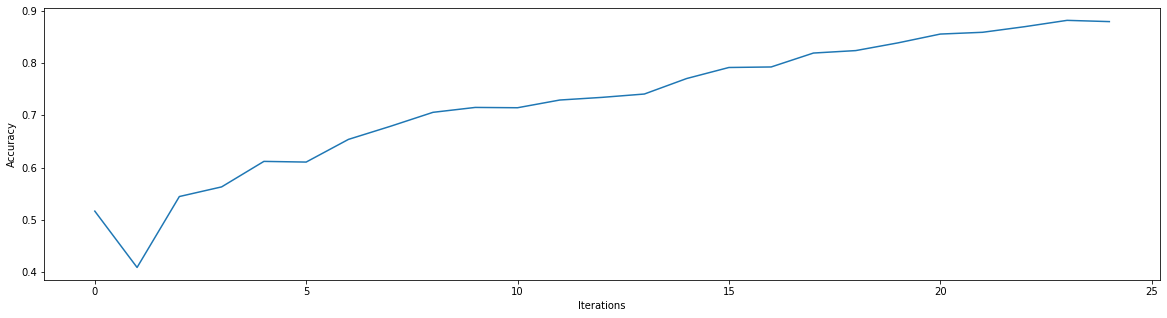

In [11]:
draw_line_graph(test_accuracies[0], 'Accuracy', 'Iterations')

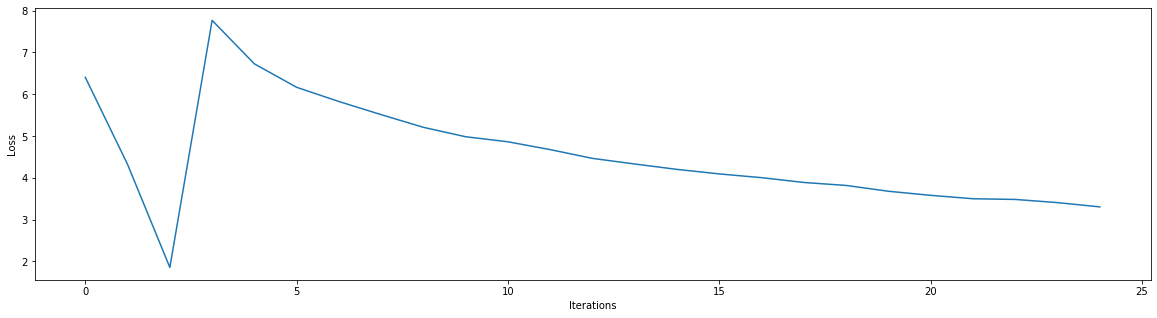

In [12]:
draw_line_graph(train_loss[0], 'Loss', 'Iterations')

In [42]:
path = 'results/200/raw-xavier/results-200-raw-xavier-init-'
dev_accuracies = get_scores(path, 'train loss', 'dev acc', 9, 1, 11)
train_loss, train_loss_max = get_scores(path, 'train loss', 'train loss', 12, 1, 11)
test_accuracies, test_max_acc = get_scores(path, 'test acc', 'test acc', 10, 1, 11)
test_precision = get_scores(path, 'test acc', 'test precision', 16, 1, 11)
test_recall = get_scores(path, 'test acc', 'test recall', 13, 1, 11)
test_f1_score, test_max_f1 = get_scores(path, 'test acc', 'test f1', 9, 1, 11)

<Figure size 1440x360 with 0 Axes>

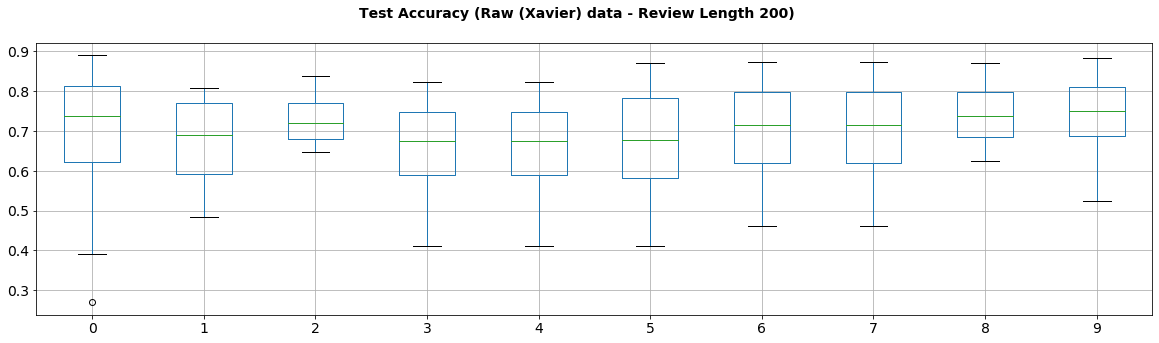

In [43]:
draw_boxplot(test_accuracies, 'Test Accuracy (Raw (Xavier) data - Review Length 200)')

<Figure size 1440x360 with 0 Axes>

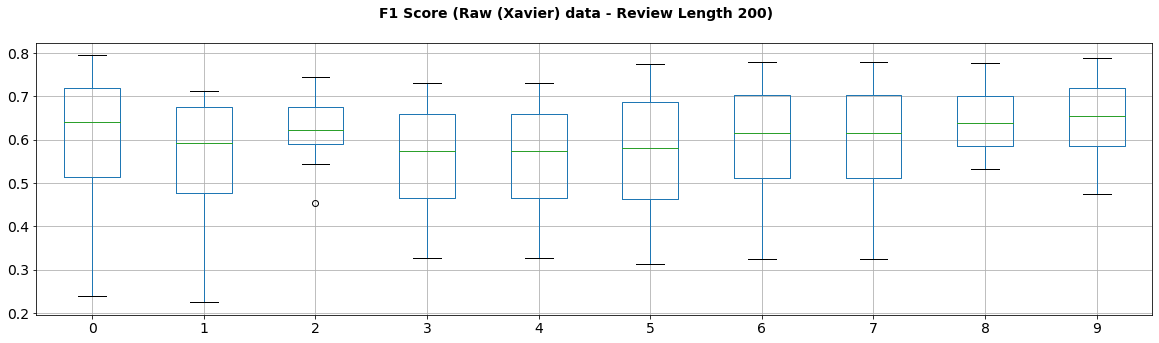

In [45]:
draw_boxplot(test_f1_score, 'F1 Score (Raw (Xavier) data - Review Length 200)')

In [38]:
test_accuracies, test_max_acc = get_scores(path, 'test acc', 'test acc', 10, 1, 2)

train_loss, train_loss_max = get_scores(path, 'train loss', 'train loss', 12, 1, 2)

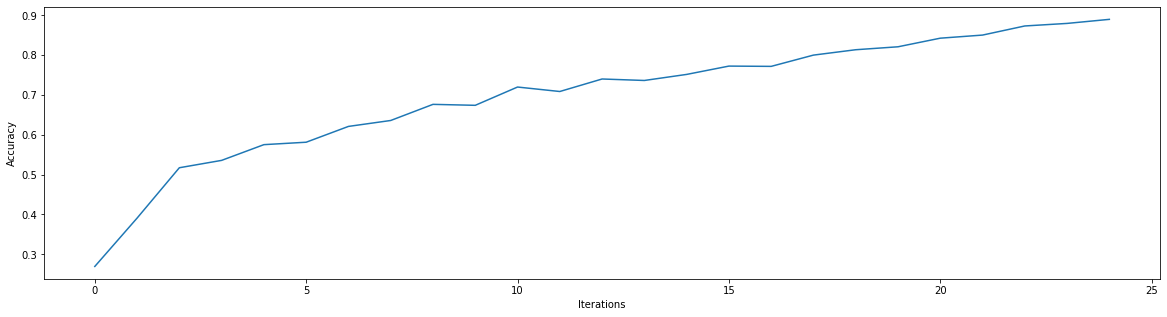

In [39]:
draw_line_graph(test_accuracies[0], 'Accuracy', 'Iterations')

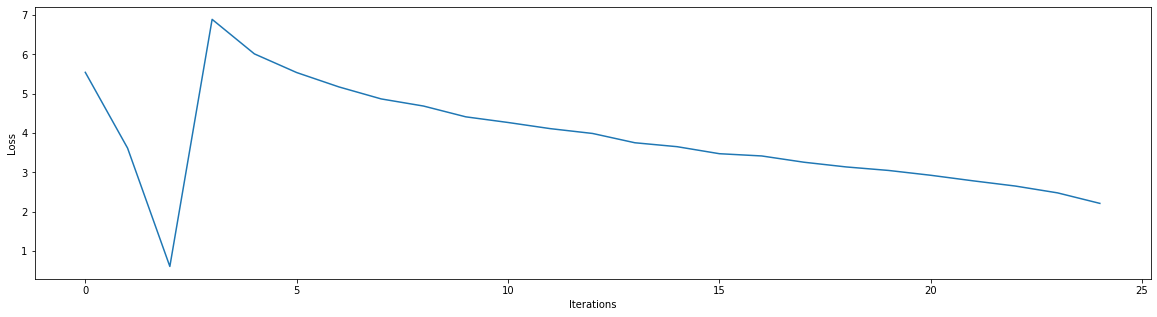

In [40]:
draw_line_graph(train_loss[0], 'Loss', 'Iterations')